# <div style="color:red;text-align:center;">协方差与相关系数</div>

### 一、协方差

可以通俗的理解为：两个变量在变化过程中是同方向变化？还是反方向变化？同向或反向程度如何？

你变大，同时我也变大，说明两个变量是同向变化的，这时协方差就是正的。

你变大，同时我变小，说明两个变量是反向变化的，这时协方差就是负的。

从数值来看，协方差的数值越大，两个变量同向程度也就越大。反之亦然。

咱们从公式出发来理解一下：

$$\operatorname { Cov } ( X , Y ) = E [ ( X - \mu _ { x } ) ( Y - \mu _ { y } ) ]$$

公式简单翻译一下是：如果有X,Y两个变量，每个时刻的“X值与其均值之差”乘以“Y值与其均值之差”得到一个乘积，再对这每时刻的乘积求和并求出均值（其实是求“期望”，但就不引申太多新概念了，简单认为就是求均值了）。


下面举个例子来说明吧：

比如有两个变量X,Y，观察t1-t5（5个时刻）他们的变化情况。

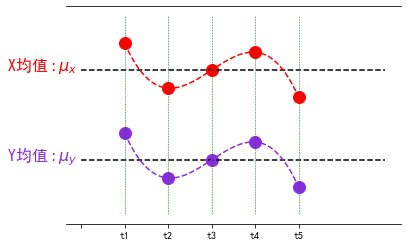

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

def show_img(x_data,y1_data,y2_data,annotate_num=0):
    # 设置matplotlib库字体的非衬线字体为黑体
    plt.rcParams["font.sans-serif"]=["SimHei"]
    # 设置matplotlib库字体族为非衬线字体
    plt.rcParams["font.family"]="sans-serif"

    fig, ax = plt.subplots()
    # 取消边框
    for key, spine in ax.spines.items():
        # 'left', 'right', 'bottom', 'top'
        if key == 'left' or key == 'right':
            spine.set_visible(False)
    plt.xticks(np.arange(6), ('','t1', 't2', 't3', 't4', 't5'))
    plt.yticks([])

    # 上部分图
    x_mean=[0,2,3,4,7]
    #x_list=[1,2,3,4,5]
    x_list=x_data

    x=np.array(x_list)
    # [19,14,16,18,13]
    y=np.array(y1_data)
    y_mean=np.mean(y)
    y_mean_list=y_mean.repeat(5)
    #plt.plot(x,y,'ro')
    plt.plot(x,y,color='red', marker='o', linestyle='dashed',linewidth=0, markersize=12)
    plt.plot(x_mean,y_mean_list,'k--')
    x_smooth = np.linspace(x.min(),x.max(),300) #300 represents number of points to make between T.min and T.max
    y_smooth = make_interp_spline(x, y)(x_smooth)
    plt.plot(x_smooth,y_smooth,'r--')
    plt.text(-1.7,np.mean(y),r'X均值'+r'$:\mu_x$', fontdict={'size':16,'color':'r'})

    # 下部分图
    # [9,4,6,8,3]
    y2=np.array(y2_data)
    y2_mean=np.mean(y2)
    y2_mean_list=y2_mean.repeat(5)
    #plt.plot(x,y,'ro')
    plt.plot(x,y2,color='blueviolet', marker='o', linestyle='dashed',linewidth=0, markersize=12)
    plt.plot(x_mean,y2_mean_list,'k--')
    x2_smooth = np.linspace(x.min(),x.max(),300) #300 represents number of points to make between T.min and T.max
    y_smooth = make_interp_spline(x, y2)(x2_smooth)
    plt.plot(x_smooth,y_smooth,color='blueviolet',linestyle='dashed')
    plt.text(-1.7,np.mean(y2),r'Y均值'+r'$:\mu_y$', fontdict={'size':16,'color':'blueviolet'})

    # 画虚线
    d_y=np.linspace(0,22,10)
    for i in range(len(x_list)):
        d_x=np.array([x_list[i] for j in range(10)])
        plt.plot(d_x,d_y,'g--',linewidth=0.5)

    # 注释箭头线
    if(annotate_num>len(x_list)):
        annotate_num=len(x_list)
    if(annotate_num<0):
        annotate_num=0
    for i in range(annotate_num):
        # 第一组注释线    
        ax.annotate("", xy=(x_data[i]-0.1, y2_mean), xytext=(x_data[i]-0.1, y2_data[i]),arrowprops=dict(arrowstyle="<->"))
        plt.text(x_data[i]-0.5,y2_data[i]-2,r'$Y_{}-\mu_y$'.format(i+1), fontdict={'size':12,'color':'b'})
        ax.annotate("", xy=(x_data[i]-0.1, y_mean), xytext=(x_data[i]-0.1, y1_data[i]),arrowprops=dict(arrowstyle="<->"))
        plt.text(x_data[i]-0.5,y1_data[i]-2,r'$X_{}-\mu_x$'.format(i+1), fontdict={'size':12,'color':'b'})
    
#     # 第一组注释线    
#     ax.annotate("", xy=(x_data[0]-0.1, y2_mean), xytext=(x_data[0]-0.1, y2_data[0]),arrowprops=dict(arrowstyle="<->"))
#     plt.text(x_data[0]-0.5,y2_data[0]-2,r'$Y_1-\mu_y$', fontdict={'size':12,'color':'b'})
#     ax.annotate("", xy=(x_data[0]-0.1, y_mean), xytext=(x_data[0]-0.1, y1_data[0]),arrowprops=dict(arrowstyle="<->"))
#     plt.text(x_data[0]-0.5,y1_data[0]-2,r'$X_1-\mu_x$', fontdict={'size':12,'color':'b'})
#     # 第二组注释线
#     ax.annotate("", xy=(x_data[1]-0.1, y2_mean), xytext=(x_data[1]-0.1, y2_data[1]),arrowprops=dict(arrowstyle="<->"))
#     plt.text(x_data[1]-0.5,y2_data[1]-2,r'$Y_2-\mu_y$', fontdict={'size':12,'color':'b'})
#     ax.annotate("", xy=(x_data[1]-0.1, y_mean), xytext=(x_data[1]-0.1, y1_data[1]),arrowprops=dict(arrowstyle="<->"))
#     plt.text(x_data[1]-0.5,y1_data[1]-2,r'$X_2-\mu_x$', fontdict={'size':12,'color':'b'})    
        
    # t时刻标注
    plt.show()
    pass

    
show_img([1,2,3,4,5],[19,14,16,18,13],[9,4,6,8,3])

简单做了个图：分别用红点和紫点表示X、Y，横轴是时间。可以看到X，Y均围绕各自的均值运动，并且很明显是同向变化的。

这时，我们发现每一时刻 $X-μ_x$的值与 $Y-μ_y$的值的“正负号”一定相同（如下图：比如t1时刻，他们同为正，t2时刻他们同为负）

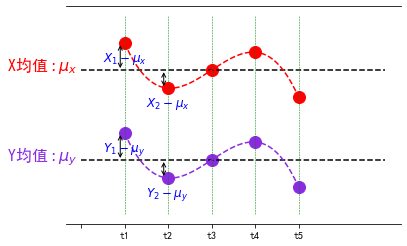

In [4]:
show_img([1,2,3,4,5],[19,14,16,18,13],[9,4,6,8,3],2)

所以，像上图那样，当他们同向变化时，$X-μ_x$与 $Y-μ_y$的乘积为正。这样，当你把t1-t5时刻$X-μ_x$与 $Y-μ_y$的乘积加在一起，求平均后也就是正数了，也就是协方差为正数，表示的也是同向运动。

如果反向运动呢？


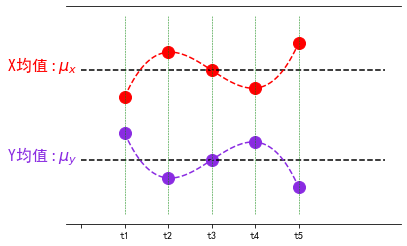

In [5]:
show_img([1,2,3,4,5],[13,18,16,14,19],[9,4,6,8,3])

很明显，$X-μ_x$的值与$Y-μ_y$的值的“正负号”一定相反，于是$X-μ_x$与$Y-μ_y$的乘积就是负值了。
这样当你把t1-t5时刻$X-μ_x$与$Y-μ_y$的乘积加在一起，求平均的时候也就是负数了，也就是协方差为负，表示反向运动。

当然上面说的是两种特殊情况，很多时候X，Y的运动是不规律的，比如：

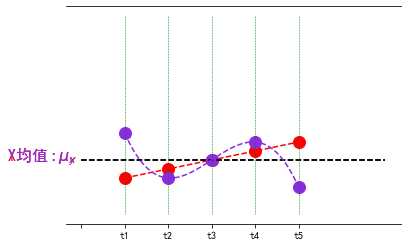

In [6]:
show_img([1,2,3,4,5],[4,5,6,7,8],[9,4,6,8,3])

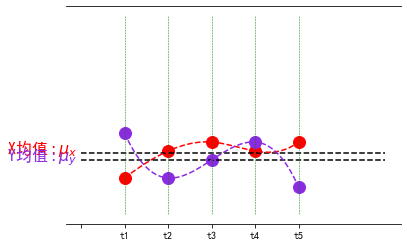

In [5]:
show_img([1,2,3,4,5],[4,7,8,7,8],[9,4,6,8,3])

这时，很可能某一时刻$X-μ_x$的值与$Y-μ_y$的值乘积为正，另外一个时刻$X-μ_x$的值与$Y-μ_y$的值乘积为负。

将每一时刻$X-μ_x$与$Y-μ_y$的乘积加在一起，其中的正负项就会抵消掉，最后求平均得出的值就是协方差，通过协方差的数值大小，就可以判断这两个变量同向或反向的程度了。

所以，t1-t5时刻中，$X-μ_x$与$Y-μ_y$的乘积为正的越多，说明同向变化的次数越多，也即同向程度越高。反之亦然。

总结一下，如果协方差为正，说明X，Y同向变化，协方差越大说明同向程度越高；如果协方差为负，说明X，Y反向运动，协方差越小说明反向程度越高。

--------------



这个时候，你可能会有这样的疑问：

那如果X，Y同向变化，但X大于均值，Y小于均值，那$X-μ_x$与$Y-μ_y$的乘积为负值啊？这不是矛盾了吗？

那就继续往下看……

这种情况是有可能出现的，比如：



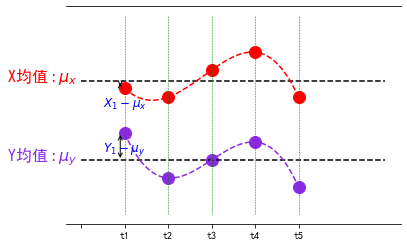

In [7]:
show_img([1,2,3,4,5],[14,13,16,18,13],[9,4,6,8,3],1)

可以看到，t1时刻，$X-μ_x$与$Y-μ_y$的符号相反，他们的乘积为负值。

但是，总体看，这两个变量的协方差仍然是正的，因为你还要计算t2，t3……t5时刻$X-μ_x$与$Y-μ_y$的乘积，然后再把这5个时刻的乘积求和做均值，才是最后X，Y的协方差。1个负、4个正，显然最后协方差很大可能性是正的。

所以t1时刻$X-μ_x$与$Y-μ_y$的乘积为负值，并不能说明他们反向运动，要结合整体的情况来判断。

那么你可能又要问了，既然都是同向变化，那t1时刻$X-μ_x$与$Y-μ_y$的乘积为负值、其他时刻乘积为正的这种情况，与，t1-t5时刻$X-μ_x$与$Y-μ_y$的乘积均为正值的情况，到底有什么差异呢？

这点其实前面也解释过了，差异就是：第一种情况的同向程度不如第二种情况的同向程度大（第一种情况4正1负，第二种情况5正，所以第一种情况的协方差小于第二种情况的协方差，第一种情况X，Y变化的同向程度要小于第二种情况）。


另外，如果你还钻牛角尖，说如果t1，t2，t3……t5时刻X，Y都在增大，而且X都比均值大，Y都比均值小，这种情况协方差不就是负的了？5个负值求平均肯定是负值啊？但是X，Y都是增大的，都是同向变化的，这不就矛盾了？

这个更好解释了：这种情况不可能出现！

因为，你的均值算错了……

X，Y的值应该均匀的分布在均值两侧才对，不可能都比均值大，或都比均值小。
![22.png](22.png)

所以，实际它的图应该是下面这样的：


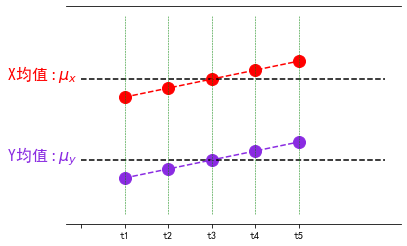

In [8]:
show_img([1,2,3,4,5],[13,14,15,16,17],[4,5,6,7,8])


发现没有，又变成$X-μ_x$与$Y-μ_y$的符号相同的情况了～有没有种被大自然打败的感觉～

好了，现在，对于协方差应该有点感觉了吧？

### 二、相关系数

对于相关系数，我们从它的公式入手。一般情况下，相关系数的公式为：

$$\rho = \frac { \operatorname { Cov } ( X , Y ) } { \sigma _ { X } \sigma _ { Y } }$$

翻译一下：就是用X、Y的协方差除以X的标准差和Y的标准差。

所以，相关系数也可以看成协方差：一种剔除了两个变量量纲影响、标准化后的特殊协方差。

既然是一种特殊的协方差，那它：

1、也可以反映两个变量变化时是同向还是反向，如果同向变化就为正，反向变化就为负。

2、由于它是标准化后的协方差，因此更重要的特性来了：它消除了两个变量变化幅度的影响，而只是单纯反应两个变量每单位变化时的相似程度。

比较抽象，下面还是举个例子来说明：

首先，还是承接上文，还是用小点来举例，变量X、Y变化的示意图（X为红点，Y为绿点），来看两种情况：

![44.png](44.png)

很容易就可以看出以上两种情况X，Y都是同向变化的，而这个“同向变化”，有个非常显著特征：X、Y同向变化的过程，具有极高的相似度！无论第一还是第二种情况下，都是：t1时刻X、Y都大于均值，t2时刻X、Y都变小且小于均值，t3时刻X、Y继续变小且小于均值，t4时刻X、Y变大但仍小于均值，t5时刻X、Y变大且大于均值……

可是，计算一下他们的协方差，

第一种情况下：

$$[ ( 100 - 0 ) \times ( 70 - 0 ) + ( - 100 - 0 ) \times ( - 70 - 0 ) + ( - 200 - 0 ) \times ( - 200 - 0 ) \ldots ] \div 7 \approx 15428.57$$

第二种情况下：

$$[ ( 0.01 - 0 ) \times ( 70 - 0 ) + ( - 0.01 - 0 ) \times ( - 70 - 0 ) + ( - 0.02 - 0 ) \times ( - 200 - 0 ) \ldots ] \div 7 \approx 1.542857$$

协方差差出了一万倍，只能从两个协方差都是正数判断出两种情况下X、Y都是同向变化，但是，一点也看不出两种情况下X、Y的变化都具有相似性这一特点。

这是为什么呢？

因为以上两种情况下，在X、Y两个变量同向变化时，X变化的幅度不同，这样，两种情况的协方差更多的被变量的变化幅度所影响了。

所以，为了能准确的研究两个变量在变化过程中的相似程度，我们就要把变化幅度对协方差的影响，从协方差中剔除掉。于是，相关系数就横空出世了，就有了最开始相关系数的公式：

$$\rho = \frac { \operatorname { Cov } ( X , Y ) } { \sigma _ { X } \sigma _ { Y } }$$

那么为什么要通过除以标准差的方式来剔除变化幅度的影响呢？咱们简单从标准差公式看一下：

$$\sigma _ { X } = \sqrt { E ( ( X - \mu _ { x } ) ^ { 2 } ) }$$

从公式可以看出，标准差计算方法为，每一时刻变量值与变量均值之差再平方，求得一个数值，再将每一时刻这个数值相加后求平均，再开方。

“变量值与变量均值之差”$X-μ_x$是什么呢？就是偏离均值的幅度：

![55.png](55.png)

那为何要对它做平方呢？因为有时候变量值与均值是反向偏离的（见下图），$X-μ_x$是个负数，平方后，就可以把负号消除了。这样在后面求平均时，每一项数值才不会被正负抵消掉，最后求出的平均值才能更好的体现出每次变化偏离均值的情况。

![66.png](66.png)

当然，最后求出平均值后并没有结束，因为刚才为了消除负号，把$X-μ_x$进行了平方，那最后肯定要把求出的均值开方，将这个偏离均值的幅度还原回原来的量级。于是就有了下面标准差的公式：

$$\sigma _ { X } = \sqrt { E ( ( X - \mu _ { x } ) ^ { 2 } ) }$$

所以<span style="color:red;">标准差描述了变量在整体变化过程中偏离均值的幅度</span>。协方差除以标准差，<span style="color:red;">也就是把协方差中变量变化幅度对协方差的影响剔除掉，这样协方差也就标准化了，它反应的就是两个变量每单位变化时的情况</span>。这也就是相关系数的公式含义了。

同时，你可以反过来想象一下：既然相关系数是协方差除以标准差，那么，当X或Y的波动幅度变大的时候，它们的协方差会变大，标准差也会变大，这样相关系数的分子分母都变大，其实变大的趋势会被抵消掉，变小时也亦然。于是，很明显的，相关系数不像协方差一样可以在＋∞到－∞间变化，它只能在＋1到－1之间变化（相关系数的取值范围在＋1到－1之间变化可以通过施瓦茨不等式来证明，有些复杂，这里就不赘述了，有兴趣的可以google下）。

总结一下，对于两个变量X、Y，

当他们的相关系数为1时，说明两个变量变化时的正向相似度最大，即，你变大一倍，我也变大一倍；你变小一倍，我也变小一倍。也即是完全正相关（以X、Y为横纵坐标轴，可以画出一条斜率为正数的直线，所以X、Y是线性关系的）。

随着他们相关系数减小，两个变量变化时的相似度也变小，当相关系数为0时，两个变量的变化过程没有任何相似度，也即两个变量无关。

当相关系数继续变小，小于0时，两个变量开始出现反向的相似度，随着相关系数继续变小，反向相似度会逐渐变大。

当相关系数为－1时，说明两个变量变化的反向相似度最大，即，你变大一倍，我变小一倍；你变小一倍，我变大一倍。也即是完全负相关（以X、Y为横纵坐标轴，可以画出一条斜率为负数的直线，所以X、Y也是线性关系的）。

有了上面的背景，我们再回到最初的变量X、Y的例子中，可以先看一下第一种情况的相关系数：

X的标准差为

$$\sigma _ { X } = \sqrt { E ( ( X - \mu _ { x } ) ^ { 2 } ) } = \sqrt { [ ( 100 - 0 ) ^ { 2 } + ( - 100 - 0 ) ^ { 2 } \cdots ] \div 7 } \approx 130.9307$$

Y的标准差为

$$\sigma _ { Y } = \sqrt { E ( ( Y - \mu _ { y } ) ^ { 2 } ) } = \sqrt { [ ( 70 - 0 ) ^ { 2 } + ( - 70 - 0 ) ^ { 2 } \cdots ] \div 7 } \approx 119.2836$$

于是相关系数为

$$\rho = 15428.57 \div ( 130.9307 \times 119.2836 ) \approx 0.9879$$

说明第一种情况下，X的变化与Y的变化具有很高的相似度，而且已经接近完全正相关了，X、Y几乎就是线性变化的。

那第二种情况呢？

X的标准差为

$$\sigma _ { X } = \sqrt { E ( ( X - \mu _ { x } ) ^ { 2 } ) } = \sqrt { [ ( 0.01 - 0 ) ^ { 2 } + ( - 0.01 - 0 ) ^ { 2 } \ldots ] \div 7 } \approx 0.01309307$$

Y的标准差为

$$\sigma _ { Y } = \sqrt { E ( ( Y - \mu _ { y } ) ^ { 2 } ) } = \sqrt { [ ( 70 - 0 ) ^ { 2 } + ( - 70 - 0 ) ^ { 2 } \cdots ] \div 7 } \approx 119.2836$$

于是相关系数为

$$\rho = 1.542857 \div ( 0.01309307 \times 119.2836 ) \approx 0.9879$$

说明第二种情况下，虽然X的变化幅度比第一种情况X的变化幅度小了10000倍，但是丝毫没有改变“X的变化与Y的变化具有很高的相似度”这一结论。同时，由于第一种、第二种情况的相关系数是相等的，因此在这两种情况下，X、Y的变化过程有着同样的相似度。

好了，讲了这么多，不知你看完是否对相关系数也有了一些感觉？


资料来源：https://www.zhihu.com/question/20852004